In [89]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [90]:
import numpy as np
import pandas as pd

In [91]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [92]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [93]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [94]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [95]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [96]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [97]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [98]:
# From measurement no bigger than 10
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [99]:
# Station no bigger than 10
engine.execute('SELECT * FROM Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [100]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print()

In [101]:
#calc the date one year from today
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)

2016-08-23


In [102]:
# Perform a query to retrieve the data and precipitation scores
percip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).\
    order_by(Measurement.date).all()
percip_data_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [103]:
# Save the query results as a Pandas DataFrame and set the index to the date column
percip_data_df = pd.DataFrame(percip_data)
percip_data_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [104]:
# Sort the dataframe by date
percip_data_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [105]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


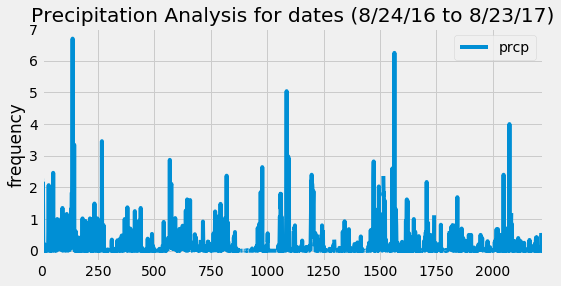

In [106]:
ax = percip_data_df.plot(figsize=(8,4))
ax.set_title("Precipitation Analysis for dates (8/24/16 to 8/23/17)")
ax.set_ylabel('frequency')
plt.show()

In [107]:
# Design a query to show how many stations are available in this dataset?

available_s= session.query(func.count(Measurement.station)).all()
available_s
print ("There is a total of {} stations available in this dataset.".format(available_s))



There is a total of [(19550,)] stations available in this dataset.


In [108]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()
print (most_active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [109]:
# Using the station id from the previous query, calculate the lowest temperature recorded

lowest_temp = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).asc()).all()
print (lowest_temp)

[('USC00518838', 511), ('USC00517948', 1372), ('USC00511918', 1979), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00519523', 2669), ('USC00513117', 2709), ('USC00519397', 2724), ('USC00519281', 2772)]


In [110]:
# highest temperature recorded, and average temperature of the most active station?

highest_avg_temp = session.query(func.avg(Measurement.tobs)).\
min = session.query(func.min(Measurement.tobs)).\
max = session.query(func.max(Measurement.tobs)).all()

print(highest_avg_temp,min, max)

[(87.0,)] <built-in function min> <built-in function max>


In [111]:
# Choose the station with the highest number of temperature observations.

highest_number = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()

print (highest_number)

('USC00519281', 'WAIHEE 837.5, HI US', 2772)


In [112]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs_data = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date <= one_year).all()
temp_obs_data_df = pd.DataFrame(temp_obs)
temp_obs_data_df.head(5)

,date,tobs
0,2010-01-01,70.0
1,2010-01-02,62.0
2,2010-01-03,74.0
3,2010-01-04,75.0
4,2010-01-05,74.0


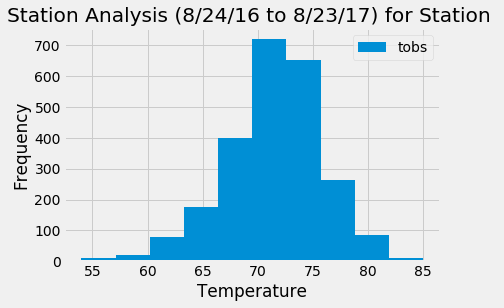

In [113]:
plt.hist(temp_obs_data_df['tobs'], bins=10)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station ")
plt.legend(["tobs"])
plt.show()